In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
df = pd.read_csv('BTC-USD.csv')

df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
357,2024-06-13,68243.101563,68365.781250,66304.562500,66756.398438,66756.398438,28955204146
358,2024-06-14,66747.570313,67294.648438,65056.894531,66011.093750,66011.093750,27403884779
359,2024-06-15,66006.742188,66402.187500,65871.773438,66191.000000,66191.000000,14121265576
360,2024-06-16,66189.359375,66894.843750,66018.250000,66639.046875,66639.046875,13281140541
361,2024-06-17,66636.515625,67188.320313,65094.964844,66490.296875,66490.296875,30006354476
362,2024-06-18,66490.976563,66556.703125,64066.957031,65140.746094,65140.746094,39481285950
363,2024-06-19,65146.660156,65695.351563,64693.300781,64960.296875,64960.296875,21103423504
364,2024-06-20,64960.296875,66438.960938,64547.847656,64828.656250,64828.656250,25641109124
365,2024-06-21,64837.988281,65007.546875,63378.894531,64096.199219,64096.199219,26188171739
366,2024-06-22,64113.863281,64471.949219,63946.906250,64270.562500,64270.562500,21615667200


In [3]:
#CHECKING FOR NULL VALUES
df.isnull().values.any()

False

In [4]:
#drop adj close column
df=df.drop(columns=['Adj Close'])


ValueError: 'locs' must be 1D with shape (M,). Your input has shape ().

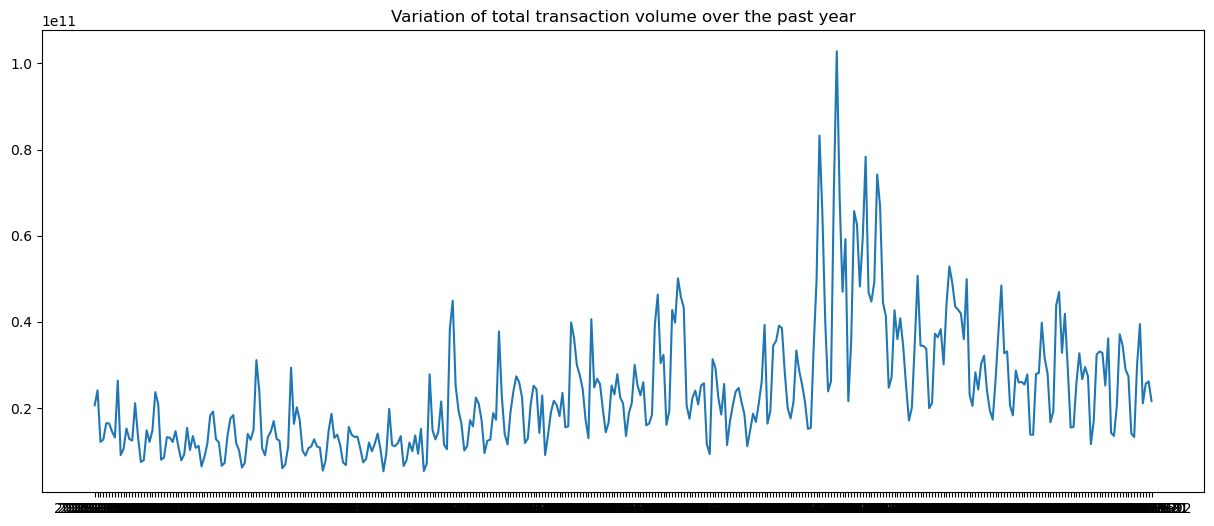

In [38]:
plt.title('Variation of total transaction volume over the past year')
plt.plot(df['Date'],df['Volume'])
plt.xticks([])



In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,20653160491
1,2023-06-23,29896.382813,31389.539063,29845.214844,30695.468750,24115570085
2,2023-06-24,30708.738281,30804.148438,30290.146484,30548.695313,12147822496
3,2023-06-25,30545.150391,31041.271484,30327.943359,30480.261719,12703464114
4,2023-06-26,30480.523438,30636.029297,29955.744141,30271.130859,16493186997


Text(0.5, 0, 'date')

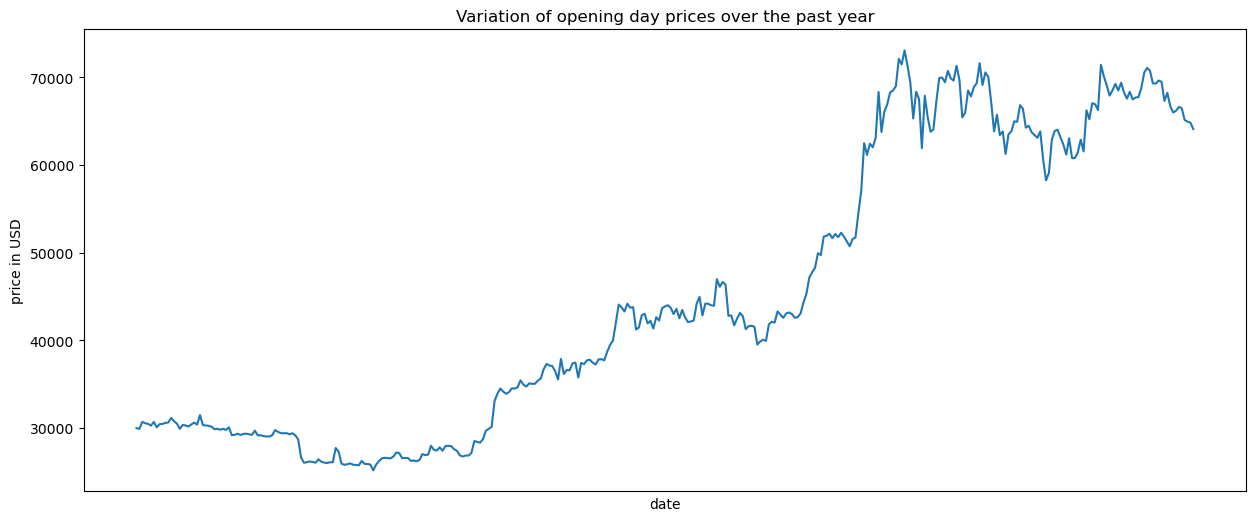

In [7]:
plt.plot(df['Date'],df['Open'])
plt.xticks([])
plt.title('Variation of opening day prices over the past year')
plt.ylabel('price in USD')
plt.xlabel('date')

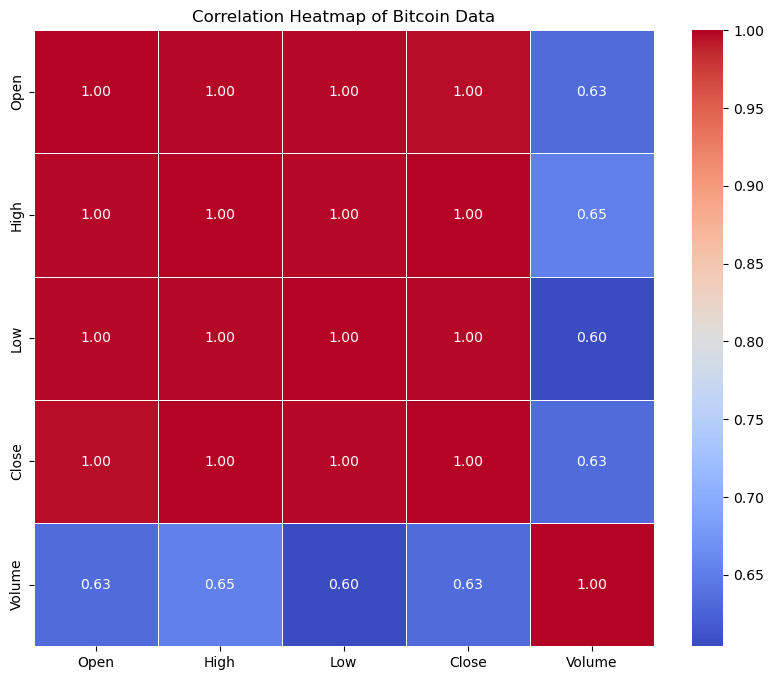

In [40]:
import seaborn as sns


# Calculate correlation matrix
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Bitcoin Data')
plt.show()


### CANDLE STICK CHART

In [ ]:
import mplfinance as mpf
df['Date'] = pd.to_datetime(df['Date'])
# Assuming df is your DataFrame containing Bitcoin data
# Make sure 'Date' column is datetime and set it as index
df.set_index('Date', inplace=True)

# Plot candlestick chart
mpf.plot(df, type='candle',
ylabel='Price', ylabel_lower='Volume')


## Moving Average

A moving average is a commonly used statistical technique in time series analysis. It calculates the average value of a series of data points over a specified period of time, updating as new data becomes available. The moving average smooths out short-term fluctuations or noise in the data, making it easier to identify trends or patterns.

For example, a 50-day moving average calculates the average value of the last 50 data points in a time series, updating with each new data point. Similarly, a 200-day moving average calculates the average value of the last 200 data points.

### How it helps:

- **Smoothing**: Moving averages help to smooth out short-term fluctuations or noise in the data, making it easier to identify underlying trends or patterns.
- **Trend Identification**: By smoothing out noise, moving averages make it easier to identify the direction of the trend in the data, whether it's upward, downward, or sideways.
- **Support and Resistance Levels**: Moving averages can act as dynamic support and resistance levels in the price chart. Traders often use moving averages to identify potential entry or exit points for trades.
- **Signal Generation**: Moving averages can generate buy or sell signals when different moving averages cross each other or when the price crosses above or below a moving average.
- **Confirmation**: Moving averages can be used to confirm the strength of a trend or the validity of a breakout. For example, a moving average crossover combined with increasing trading volume may provide stronger confirmation of a trend reversal or continuation.



### Price Above Moving Average:

**Definition**: This occurs when the current price of an asset moves above a moving average line.

**Significance**: It suggests that the asset is gaining strength and could continue to rise.

**Action**: Traders may take this as a signal to buy the asset.

### Price Below Moving Average:

**Definition**: This occurs when the current price of an asset moves below a moving average line.

**Significance**: It suggests that the asset is losing strength and could continue to fall.

**Action**: Traders may take this as a signal to sell the asset.


([], [])

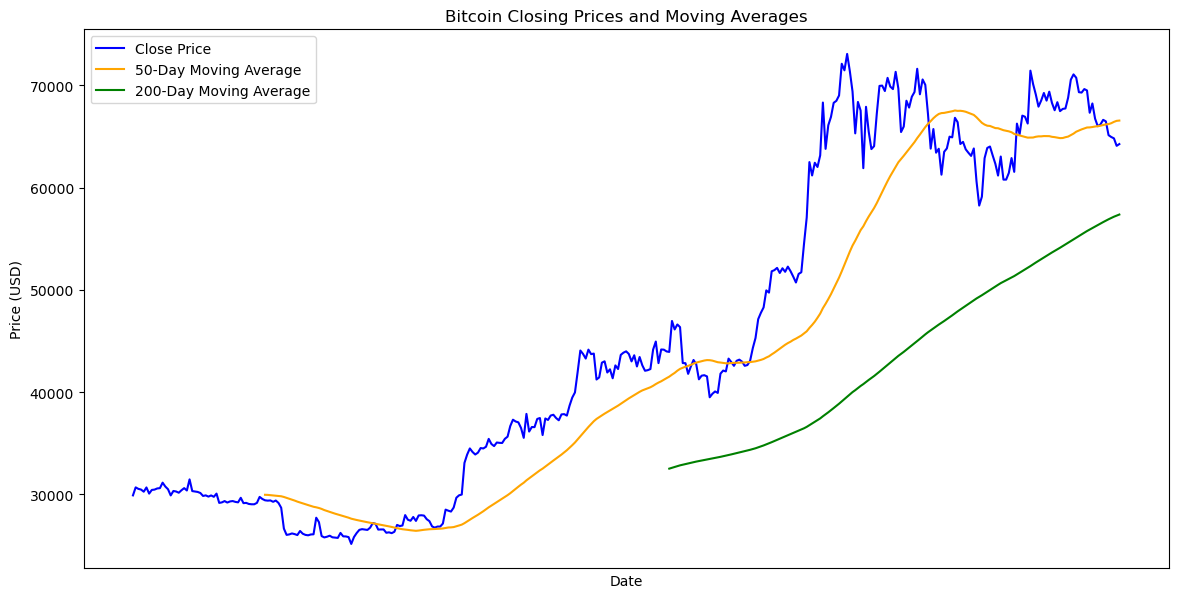

In [10]:

# Ensure 'Date' is a datetime type and set as index
new_df = df
# new_df.set_index('Date', inplace=True)

# Calculate moving averages
#MA=moving average
new_df['50 Day MA'] = new_df['Close'].rolling(window=50).mean()
new_df['200 Day MA'] = new_df['Close'].rolling(window=200).mean()

# Plot closing prices and moving averages
plt.figure(figsize=(14, 7))
plt.plot(new_df['Close'], label='Close Price', color='blue')
plt.plot(new_df['50 Day MA'], label='50-Day Moving Average', color='orange')
plt.plot(new_df['200 Day MA'], label='200-Day Moving Average', color='green')

plt.title('Bitcoin Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks([])


([], [])

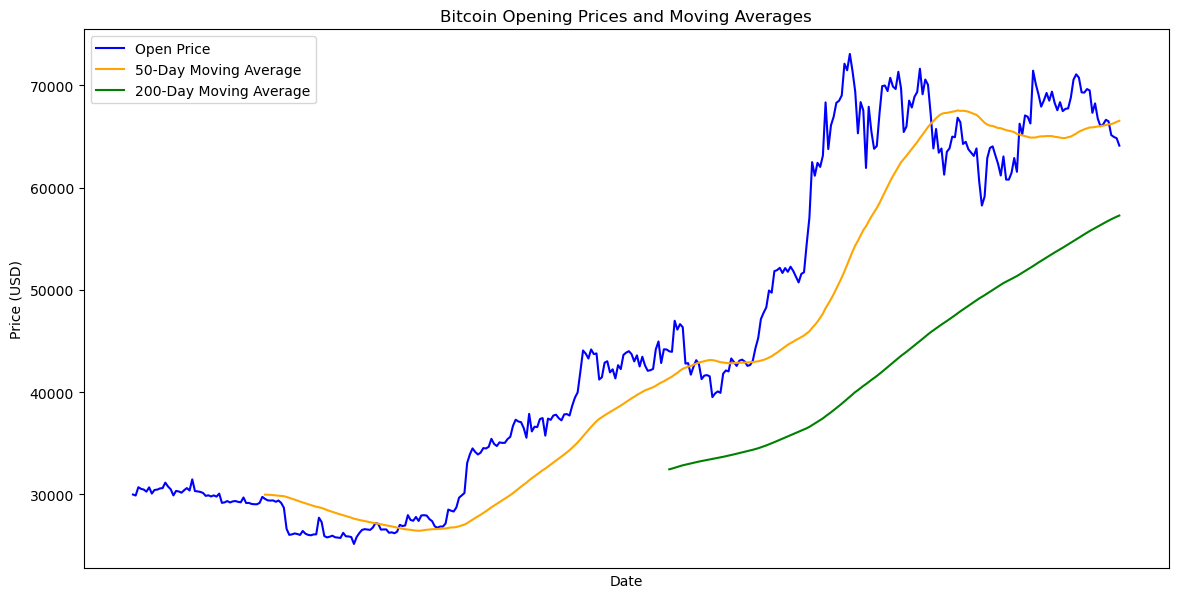

In [21]:

# Ensure 'Date' is a datetime type and set as index
new_df2 = df.copy()
new_df.set_index('Date', inplace=True)

# Calculate moving averages
#MA=moving average
new_df2['50 Day MA'] = new_df2['Open'].rolling(window=50).mean()
new_df2['200 Day MA'] = new_df2['Open'].rolling(window=200).mean()

# Plot closing prices and moving averages
plt.figure(figsize=(14, 7))
plt.plot(new_df2['Open'], label='Open Price', color='blue')
plt.plot(new_df2['50 Day MA'], label='50-Day Moving Average', color='orange')
plt.plot(new_df2['200 Day MA'], label='200-Day Moving Average', color='green')

plt.title('Bitcoin Opening Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks([])


Text(0, 0.5, 'PRICE(USD)')

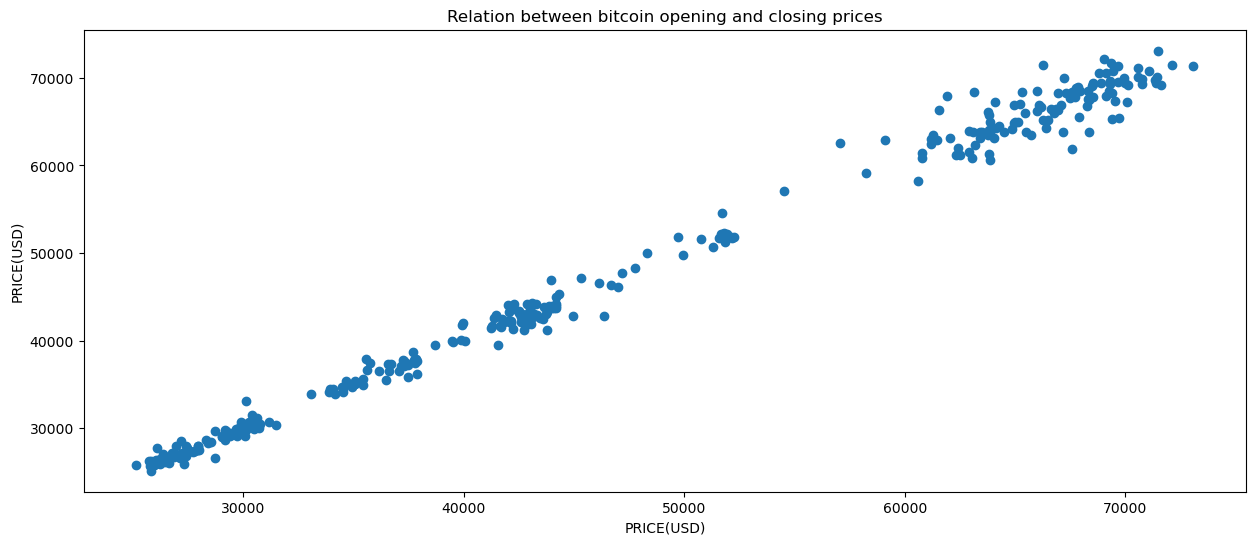

In [22]:
plt.scatter(df['Open'],df['Close'])
plt.title('Relation between bitcoin opening and closing prices')
plt.xlabel('PRICE(USD)')
plt.ylabel('PRICE(USD)')

Text(0, 0.5, 'PRICE(USD)')

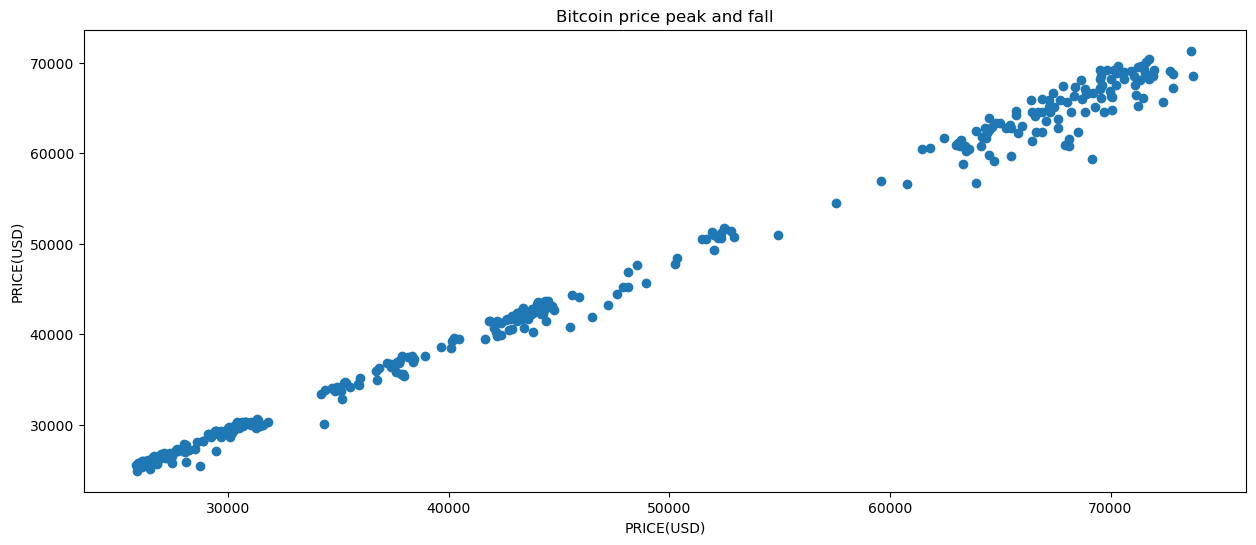

In [12]:
plt.scatter(df['High'],df['Low'])
plt.title('Bitcoin price peak and fall')
plt.xlabel('PRICE(USD)')
plt.ylabel('PRICE(USD)')

In [23]:
weekly_df=df[df.index%7==0]
weekly_df

,Date,Open,High,Low,Close,Volume,50 Day MA,200 Day MA
0,2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,20653160491,NaN,NaN
7,2023-06-29,30086.187500,30796.250000,30057.203125,30445.351563,13180860821,NaN,NaN
14,2023-07-06,30507.150391,31460.052734,29892.226563,29909.337891,21129219509,NaN,NaN
21,2023-07-13,30387.488281,31814.515625,30268.351563,31476.048828,23686079548,NaN,NaN
28,2023-07-20,29915.250000,30195.531250,29638.095703,29792.015625,14655207121,NaN,NaN
35,2023-07-27,29353.798828,29560.966797,29099.351563,29210.689453,10770779217,NaN,NaN
42,2023-08-03,29161.812500,29375.707031,28959.488281,29178.679688,12780357746,NaN,NaN
49,2023-08-10,29563.972656,29688.564453,29354.447266,29429.591797,11865344789,29982.529063,NaN
56,2023-08-17,28699.802734,28745.947266,25409.111328,26664.550781,31120851211,29826.606289,NaN
63,2023-08-24,26431.519531,26554.910156,25914.925781,26162.373047,12871532023,29215.115117,NaN


Text(0.5, 1.0, 'Bitcoin price variation over the past year')

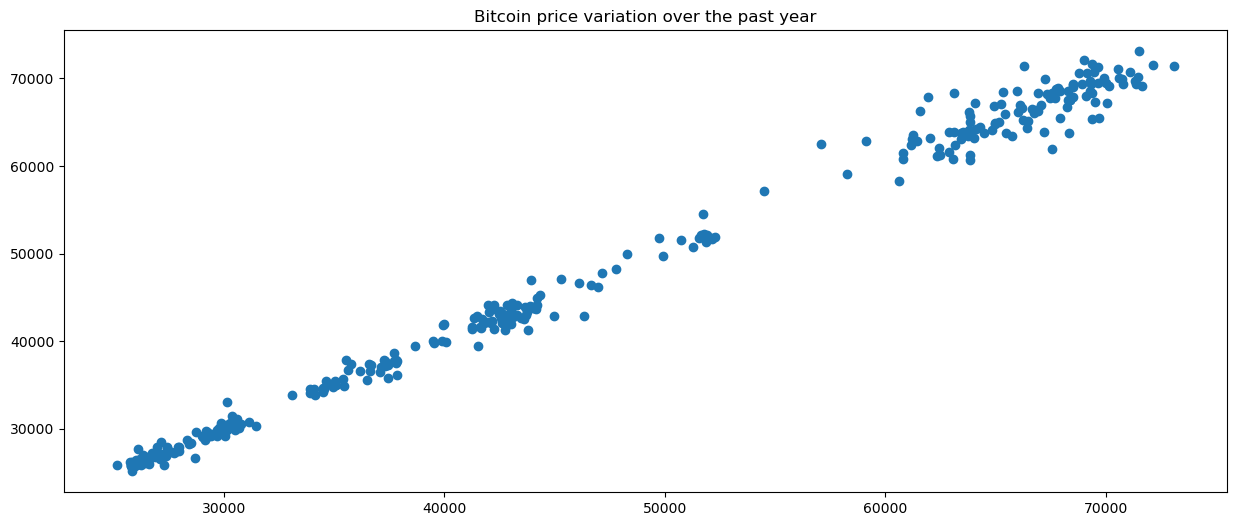

In [27]:
plt.scatter(df['Open'],df['Close'])
plt.title('Bitcoin price variation over the past year')

Text(0.5, 1.0, 'Weekly bitcoin opening price variations')

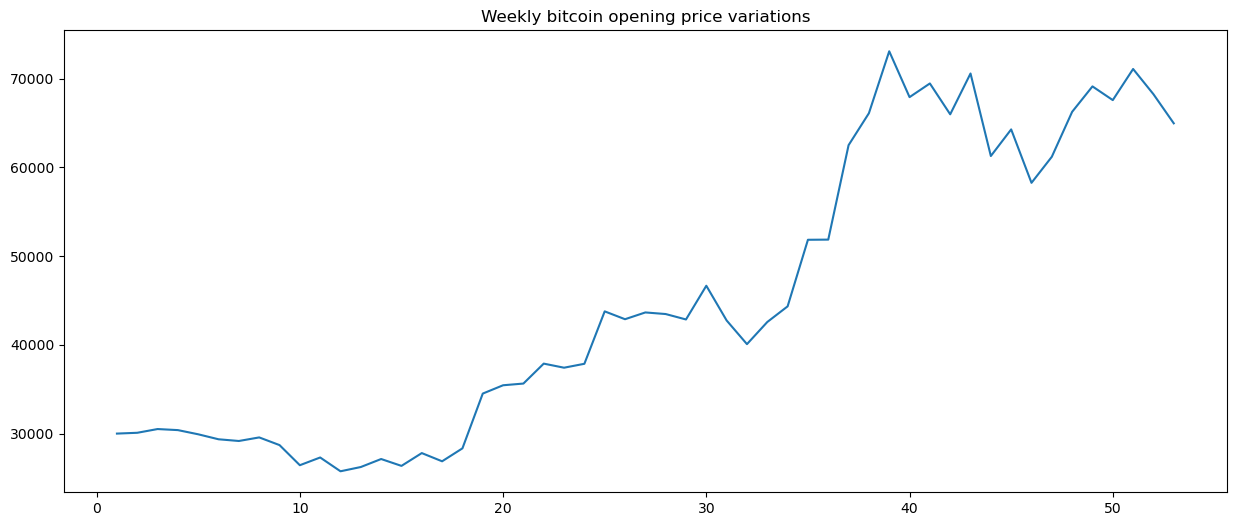

In [31]:
plt.plot(range(1,54),weekly_df['Open'])
plt.title('Weekly bitcoin opening price variations')

In [36]:
import mpl_finance

ModuleNotFoundError: No module named 'mpl_finance'

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
features=['High','Low','Close','Volume']
target=['Open']
X_train, X_test, y_train, y_test =train_test_split(df[features], df[target], test_size = 0.2,random_state=0)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_split=1e-07, min_samples_leaf=1,
#            min_samples_split=2, min_weight_fraction_leaf=0.0,
#            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
#            verbose=0, warm_start=False)

print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

# y_pred = forest_reg.predict(X_test)
# forest_mse = mean_squared_error(y_pred, y_test)
# forest_rmse = np.sqrt(forest_mse)
# print('Random Forest RMSE: %.4f' % forest_rmse)



c:\Users\sadam\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest R squared": 0.9984


In [ ]:
cross_validation = forest_reg.predict(X_test)

confidence = forest_reg.score(X_test, y_test)
print("confidence: ", confidence)
cross_validation

confidence:  0.9984343300204745


array([27599.62958983, 67202.85867216, 29156.38531258, 29786.33931622,
       25920.3263476 , 68085.80664098, 26998.44849628, 63586.3001562 ,
       51909.7666407 , 30389.70939469, 29616.99482408, 36716.29765642,
       70339.13371113, 65883.32859384, 63288.99121086, 41733.63050793,
       70041.139922  , 27559.20281251, 42577.17683618, 37123.70605489,
       37095.28105493, 43919.57476562, 26144.88572282, 68053.20093769,
       63704.33437503, 62642.51531247, 27217.68257817, 66634.69218771,
       26914.28289082, 42173.44699222, 34331.29433613, 27920.56498021,
       30167.92134766, 29346.49499988, 29246.19429692, 30526.05027343,
       26036.00476552, 35119.01957049, 71204.08445339, 25963.17396494,
       42506.75769527, 64272.34019518, 41886.75175793, 68457.05429714,
       30511.27402337, 65606.65023442, 41886.75175793, 39789.1757422 ,
       51792.13191399, 26058.48982432, 41291.63523453, 42290.03742187,
       49272.22304696, 39714.8237109 , 26598.49470721, 28756.03417983,
      

In [ ]:
test_df = pd.DataFrame(X_test, columns=features)  # Assuming X is a DataFrame with column names
test_df['Open price'] = y_test
test_df


,High,Low,Close,Volume,Open price
106,28252.537109,27215.552734,27946.597656,13492391599,27412.123047
259,68029.921875,65655.531250,66925.484375,46989543159,66099.742188
45,29160.822266,28963.833984,29041.855469,7269806994,29043.701172
26,30233.656250,29556.427734,29856.562500,13138897269,30147.070313
78,26414.005859,25677.480469,25905.654297,10817356400,26245.208984
...,...,...,...,...,...
159,38368.480469,36891.089844,37831.085938,21696137014,37247.992188
74,26081.525391,25657.025391,25812.416016,10680635106,25968.169922
170,44361.257813,43627.597656,43725.984375,17368210171,44180.019531
114,26969.000000,26814.585938,26861.707031,5388116782,26866.203125


In [ ]:
# pred_df=pd.Dataframe({
#     'Predicted Open Price':cross_validation})
# pred_df
pred_df = pd.DataFrame(cross_validation, columns=['Value'])
pred_df.reset_index(drop=True, inplace=True)
pred_df
test_df['predicted open price']=pred_df.values
test_df

,High,Low,Close,Volume,Open price,predicted open price
106,28252.537109,27215.552734,27946.597656,13492391599,27412.123047,27599.629590
259,68029.921875,65655.531250,66925.484375,46989543159,66099.742188,67202.858672
45,29160.822266,28963.833984,29041.855469,7269806994,29043.701172,29156.385313
26,30233.656250,29556.427734,29856.562500,13138897269,30147.070313,29786.339316
78,26414.005859,25677.480469,25905.654297,10817356400,26245.208984,25920.326348
...,...,...,...,...,...,...
159,38368.480469,36891.089844,37831.085938,21696137014,37247.992188,37607.960899
74,26081.525391,25657.025391,25812.416016,10680635106,25968.169922,25868.450625
170,44361.257813,43627.597656,43725.984375,17368210171,44180.019531,43928.882617
114,26969.000000,26814.585938,26861.707031,5388116782,26866.203125,26862.454981


Text(0.5, 1.0, 'Actual vs Predicted')

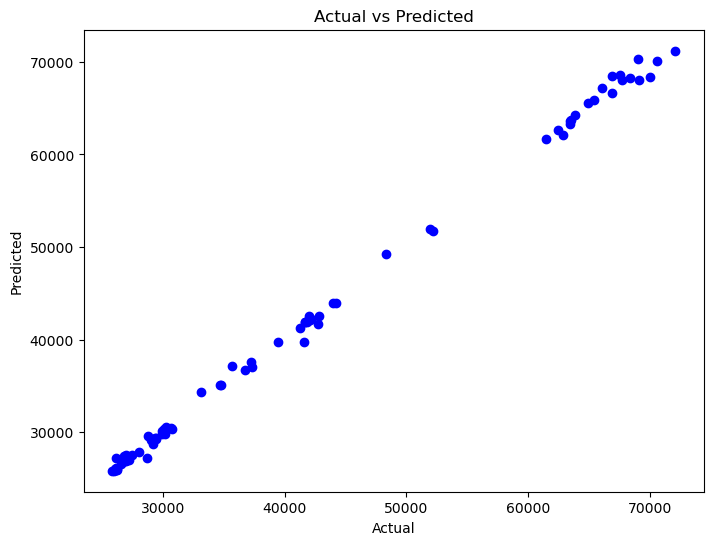

In [ ]:


plt.figure(figsize=(8, 6))
plt.scatter(y_test, cross_validation, color='blue')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
#generates a somewhat straight line further showcasing the intelligence of the model


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, cross_validation))
print(rms)

629.0045046933849


## LINEAR REGRESSION MODEL

In [ ]:

from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train,y_train)

cross_validation = clf.predict(X_test)

confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)


In [ ]:
plt.plot(cross_validation,y_test)

In [ ]:

rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)